In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

#Llamada al repositorio de GitHub
! git clone https://github.com/svvalenz/Proyecto-DAP-UTFSM.git

fatal: destination path 'Proyecto-DAP-UTFSM' already exists and is not an empty directory.


#Analisis para Variables Generales

In [2]:
#importamos el Excel de los datos (variables a estudiar)
#df_var = pd.read_excel('/content/Proyecto-DAP-UTFSM/ETL/Compilado_Datos_v1.xlsx', sheet_name='Tabla Comun')
df_var = pd.read_excel('/content/Compilado_Datos_v2.xlsx', sheet_name='Tabla Comun')
df_var['Total_sis_bcn'] = df_var['C.C']+df_var['C.V']+df_var['DAP ']
df_var.head()

,MES,DAP,C.V,C.C,PIB,IPC,TPM,IMCE,IPEC,Periodo,Total_sis_bcn
0,2019-01-01,15406.941206,3150.674201,7897.152519,NaN,0.1,2.75,50.674697,5.512931,3,26454.767926
1,2019-02-01,15287.253931,3183.521534,7926.296428,NaN,0.0,3.00,54.171510,-1.638501,3,26397.071892
2,2019-03-01,15344.480458,3236.921769,8016.438596,47106.905565,0.5,3.00,54.008384,-8.555646,3,26597.840824
3,2019-04-01,15448.041892,3180.144342,8150.493535,NaN,0.3,3.00,52.076758,2.056944,3,26778.679770
4,2019-05-01,15466.629542,3363.135343,8261.139605,NaN,0.6,3.00,50.557816,-5.854361,3,27090.904490


In [3]:
df_var.describe()

,DAP,C.V,C.C,PIB,IPC,TPM,IMCE,IPEC,Periodo,Total_sis_bcn
count,56.000000,56.000000,56.000000,18.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,18929.103409,7464.716057,12866.911823,48672.405239,0.491071,4.383929,46.661242,-0.257313,3.571429,39260.731288
std,6044.152409,3212.770824,3448.362884,3357.823357,0.474544,4.241694,7.329996,9.795608,0.499350,8880.398463
min,13656.578183,3150.674201,7897.152519,41155.094344,-0.200000,0.500000,31.741315,-22.844450,3.000000,26397.071892
25%,14706.431327,3860.720164,9644.940139,47117.258985,0.100000,0.500000,40.695419,-5.164656,3.000000,28363.156321
50%,15375.710832,7411.243940,12114.571447,48796.563183,0.400000,2.500000,47.482687,-0.413627,4.000000,42745.999813
75%,23016.160272,9919.973582,15712.224004,50507.449473,0.800000,9.187500,51.782851,5.797636,4.000000,46469.659062
max,32365.561720,13687.090863,18706.344021,54840.394063,1.900000,11.250000,60.679626,20.089559,4.000000,50560.744980


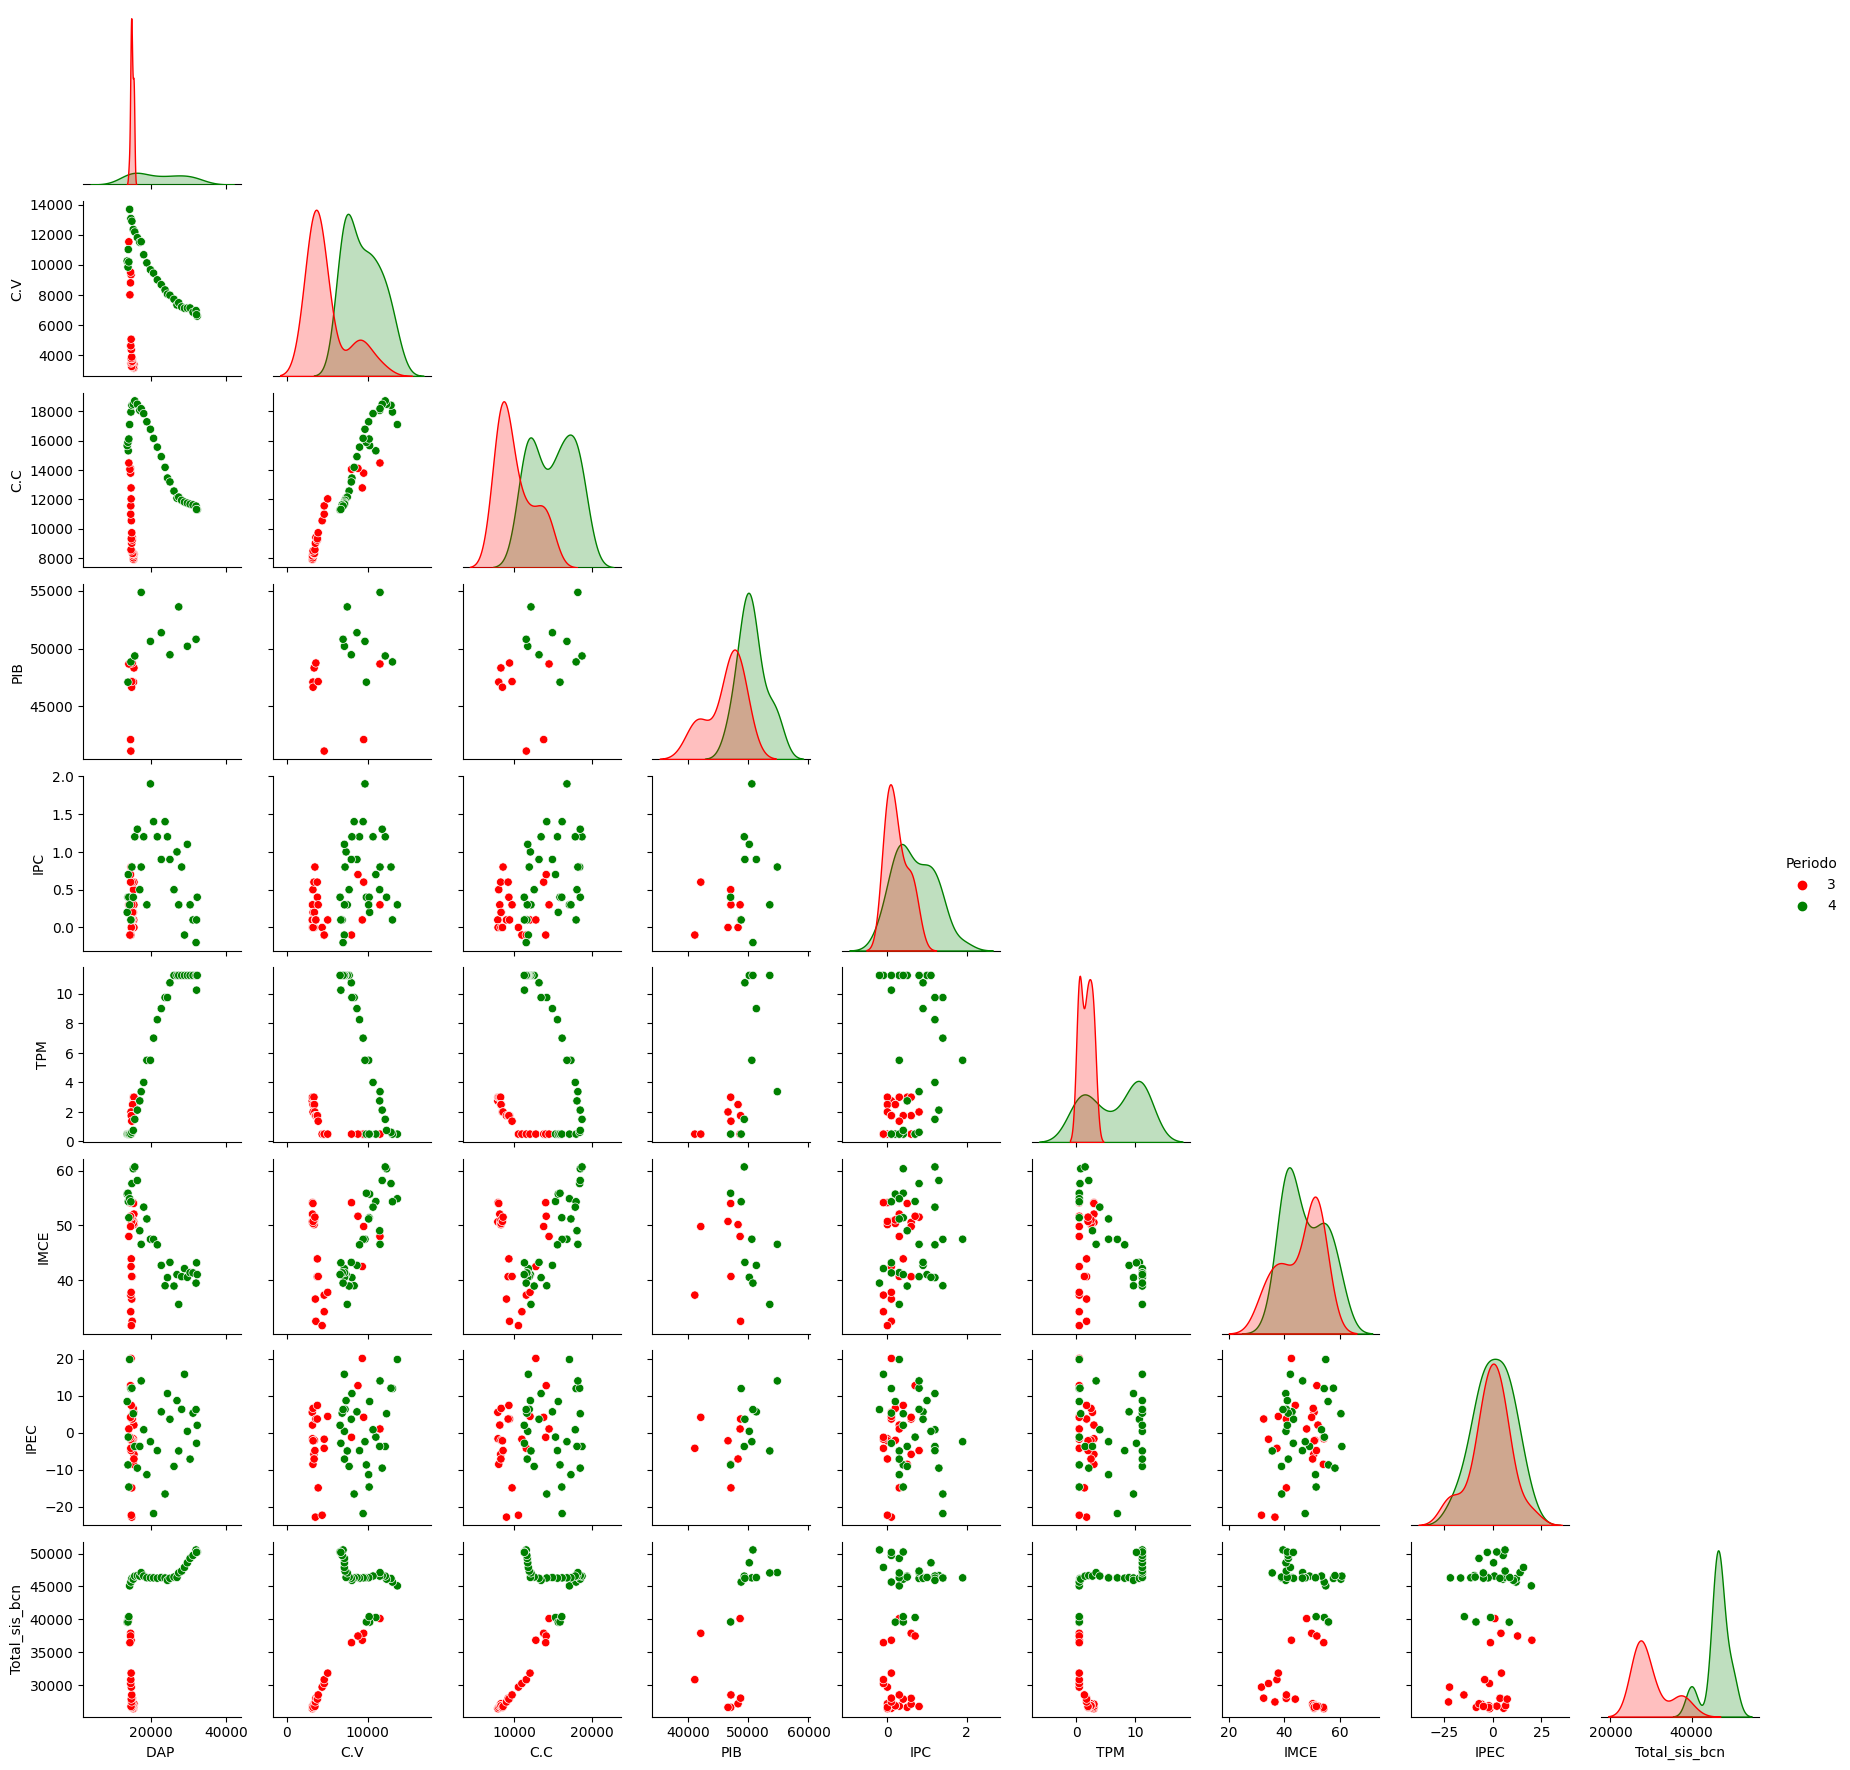

In [4]:
sns.pairplot(df_var, height=2, corner = True, hue='Periodo', palette=['red', 'green'])

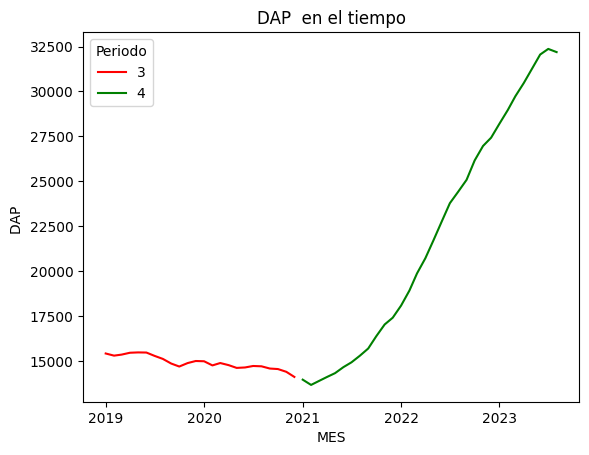

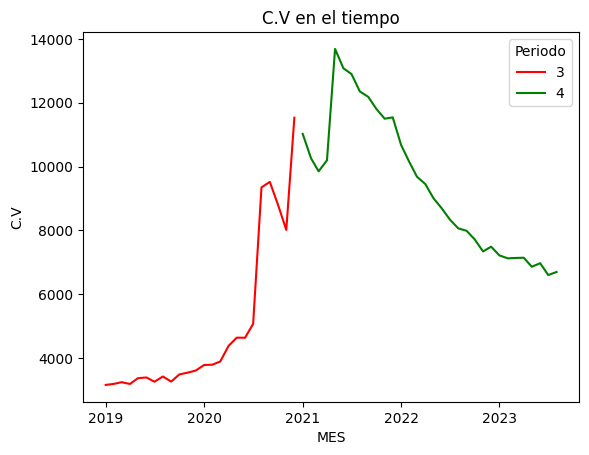

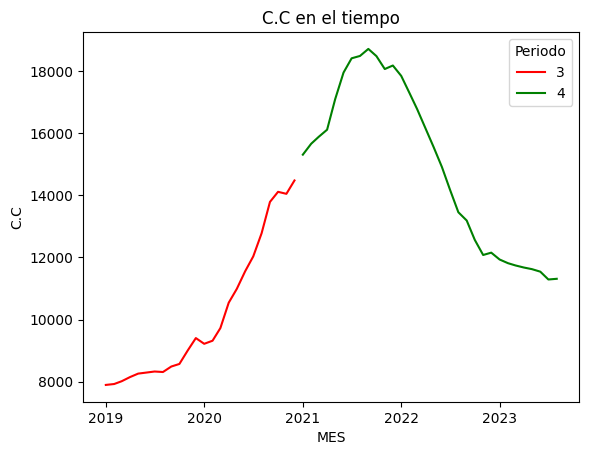

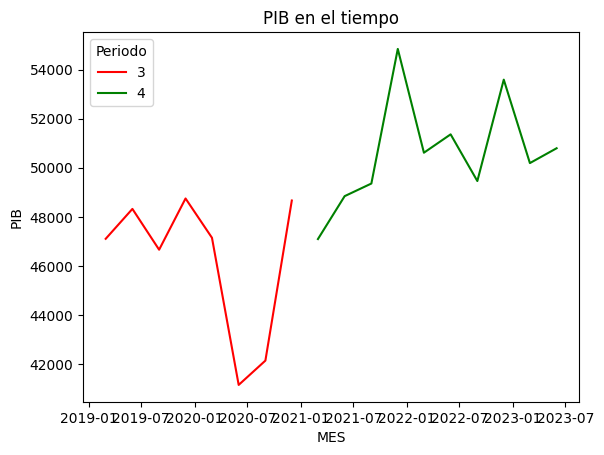

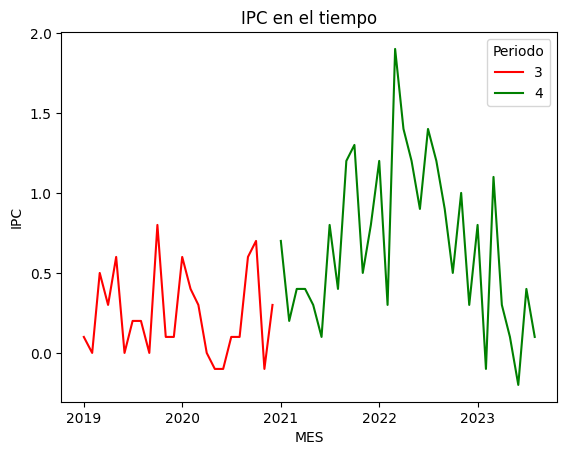

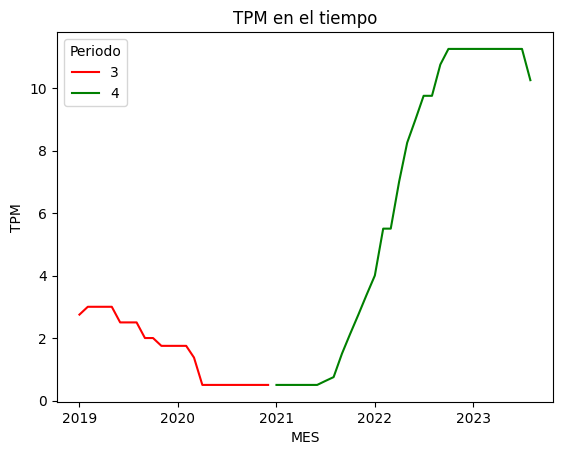

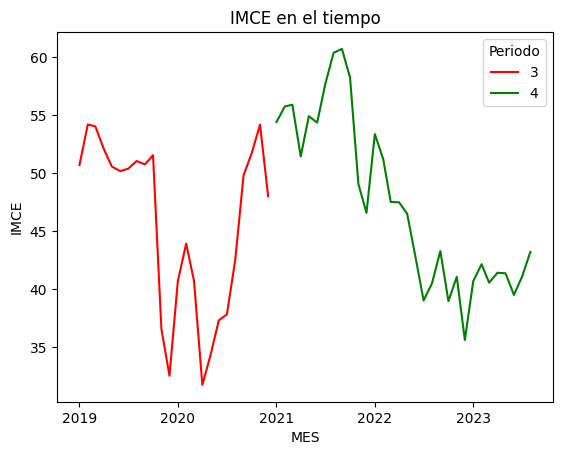

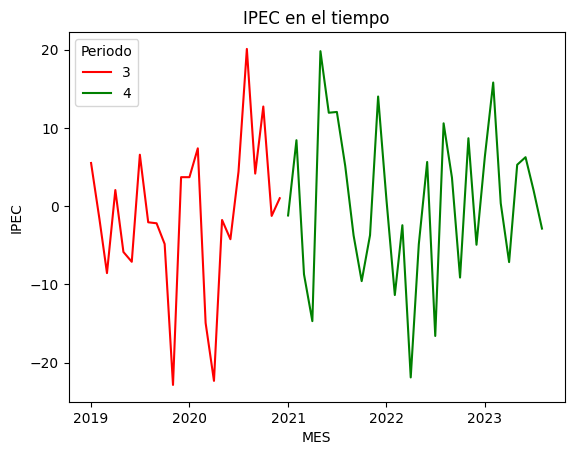

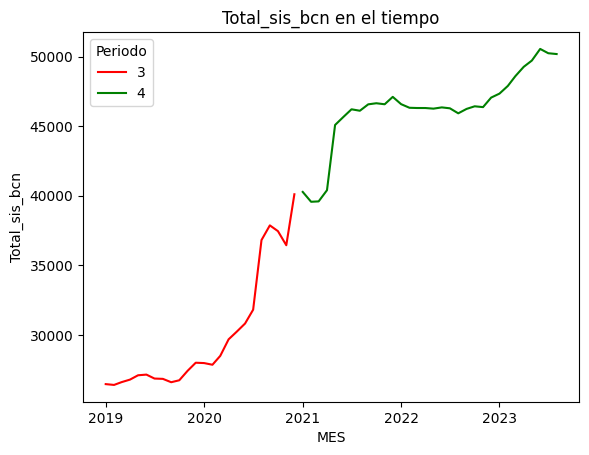

In [5]:
for col in df_var.columns[1:]:
  if col != 'Periodo':
    sns.lineplot(x =  df_var['MES'], y = df_var[col], hue=df_var['Periodo'], palette=['red', 'green']).set(title=f'{col} en el tiempo')
    plt.show()

In [6]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_var[['DAP ', 'C.V', 'C.C', 'IPC', 'TPM', 'IMCE', 'IPEC']])
scaled_df = pd.DataFrame(scaled_df, columns=['DAP ', 'C.V', 'C.C', 'IPC', 'TPM', 'IMCE', 'IPEC'])
scaled_df['Periodo'] = df_var['Periodo']
scaled_df.head()

,DAP,C.V,C.C,IPC,TPM,IMCE,IPEC,Periodo
0,0.093557,0.000000,0.000000,0.142857,0.209302,0.654267,0.660488,3
1,0.087160,0.003118,0.002696,0.095238,0.232558,0.775104,0.493920,3
2,0.090219,0.008186,0.011036,0.333333,0.232558,0.769467,0.332809,3
3,0.095754,0.002797,0.023438,0.238095,0.232558,0.702717,0.579992,3
4,0.096748,0.020164,0.033674,0.380952,0.232558,0.650228,0.395726,3


In [7]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df[['DAP ', 'C.V', 'C.C', 'IPC', 'TPM', 'IMCE', 'IPEC']])

#Crear un Data Frame de los resutados del PCA
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
#pca_df['species'] = iris[target]
pca_df['Periodo'] = df_var['Periodo']
pca_df.head()

,PC1,PC2,Periodo
0,-0.117959,0.626851,3
1,-0.141415,0.627741,3
2,-0.128205,0.568951,3
3,-0.114397,0.576863,3
4,-0.093787,0.548353,3


In [8]:
regla_pca = pd.DataFrame(
    data    = pca.components_,
    columns = ['DAP ', 'C.V', 'C.C', 'IPC', 'TPM', 'IMCE', 'IPEC'],
    index   = ['PC1', 'PC2']
)
regla_pca.head()

,DAP,C.V,C.C,IPC,TPM,IMCE,IPEC
PC1,0.576491,-0.157944,-0.188034,0.038812,0.716937,-0.302543,-0.017804
PC2,-0.192265,-0.617412,-0.636531,-0.285997,-0.216295,-0.191368,-0.107081


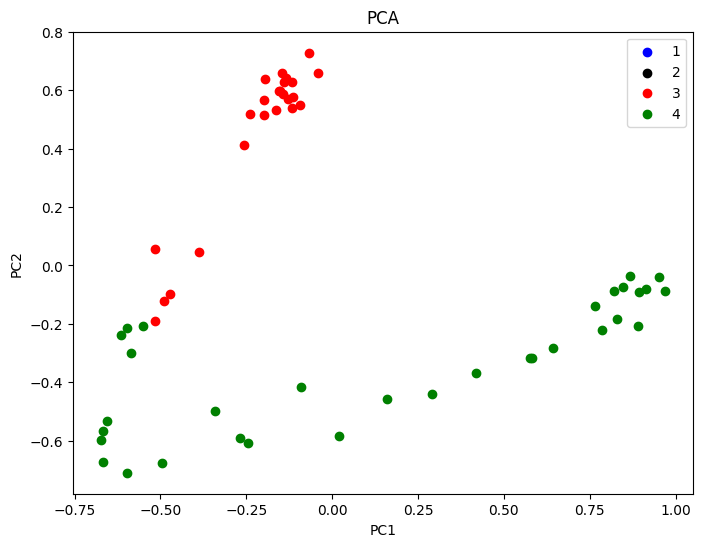

In [9]:
#Gráfico de los resultados de PCA
plt.figure(figsize=(8,6))
targets = [1, 2, 3, 4]
colors = ['blue', 'black', 'red', 'green']
for target, color in zip(targets, colors):
  indices = pca_df['Periodo'] == target
  plt.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], c = color, label = target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.legend()
plt.show()

#Mismo Analisis pero para M's

In [10]:
#importamos el Excel de los datos (variables a estudiar)
df_M = pd.read_excel('/content/Datos Listos.xlsx', sheet_name='Hoja3')
df_M.head()

,Periodo,M0,M1,M2,Ahorro,Consumo,P
0,2008-03-01,0.112463,0.151777,0.063067,0.072749,12505.184312,1
1,2008-06-01,0.112291,0.153262,0.053774,0.078485,13515.838753,1
2,2008-09-01,0.110299,0.140297,0.131171,0.072993,13677.389808,1
3,2008-12-01,0.115828,0.145133,0.188437,0.079999,14922.520515,1
4,2009-03-01,0.117363,0.156975,0.096999,0.083545,12943.461348,1


In [11]:
df_M.describe()

,M0,M1,M2,Ahorro,Consumo,P
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.232101,0.388173,0.369240,0.100340,25191.749688,2.387097
std,0.098850,0.221153,0.203179,0.033071,8625.075584,0.981047
min,0.110299,0.140297,0.031055,-0.013720,12505.184312,1.000000
25%,0.162166,0.236805,0.191858,0.079783,18161.205765,2.000000
50%,0.217789,0.343501,0.374329,0.106661,24747.067459,2.000000
75%,0.241135,0.407659,0.503864,0.122979,30023.271725,3.000000
max,0.504985,1.051264,0.888142,0.166566,44724.014710,4.000000


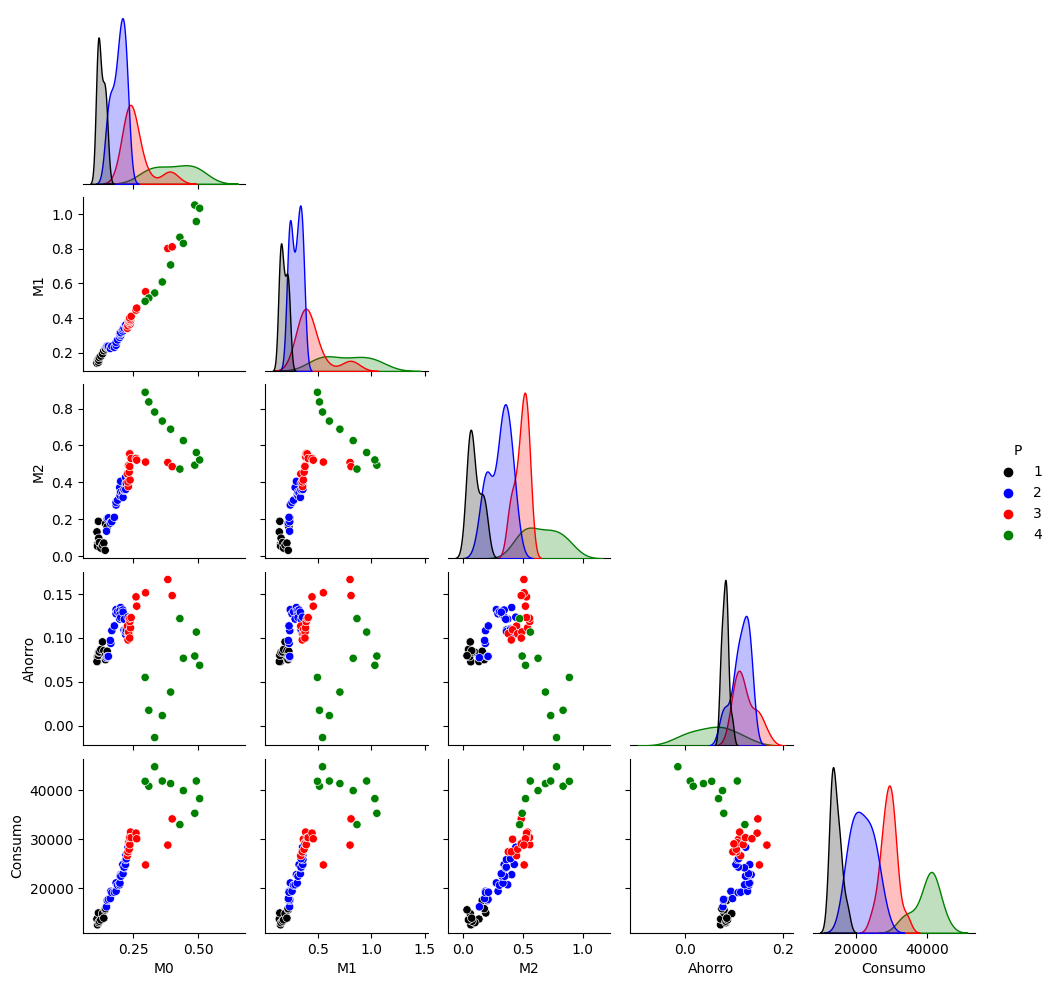

In [12]:
sns.pairplot(df_M, height=2, corner = True, hue='P', palette=['black', 'blue', 'red', 'green'])

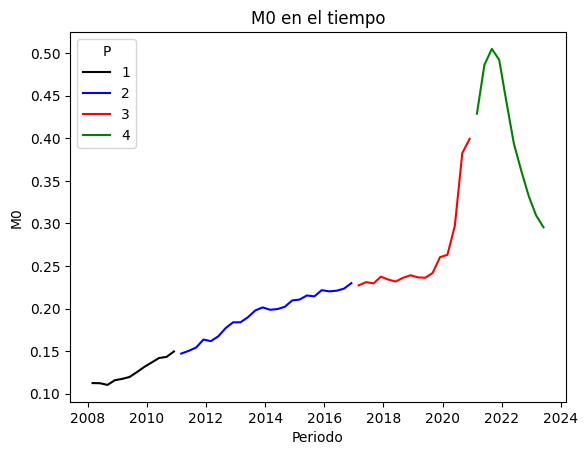

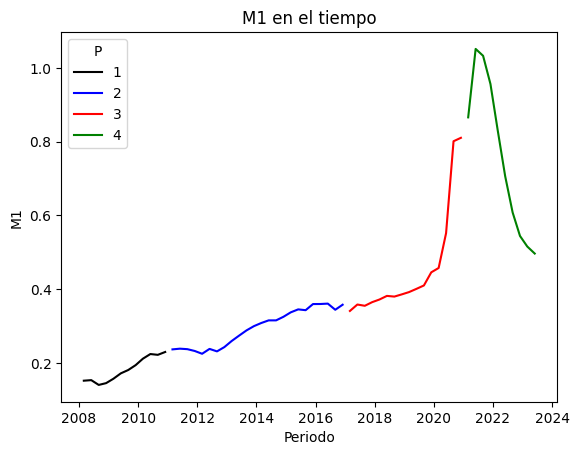

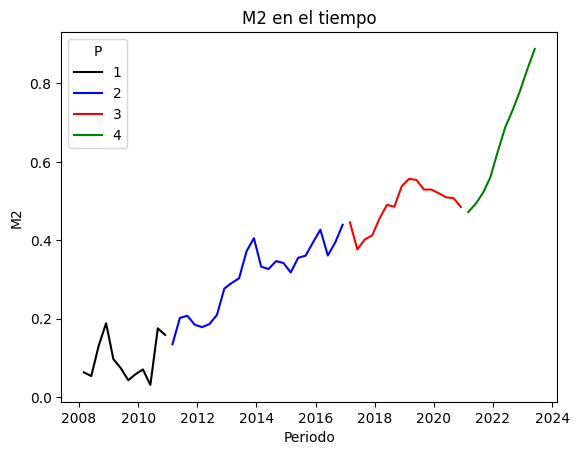

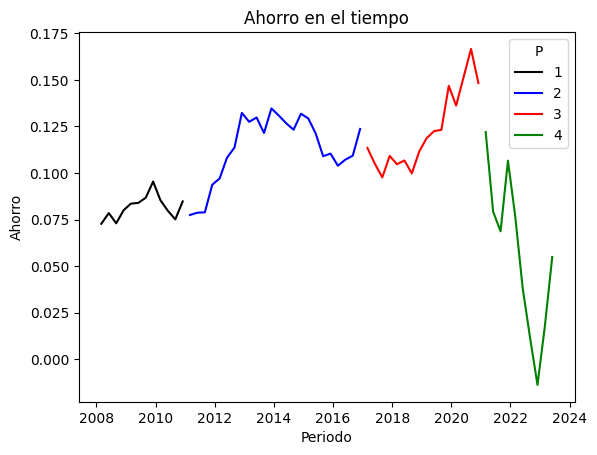

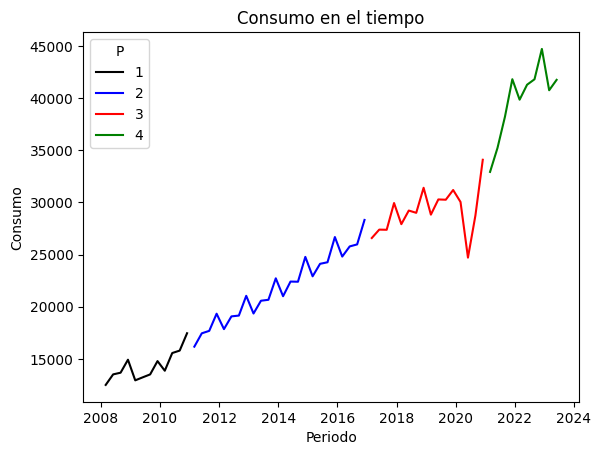

In [14]:
for col in df_M.columns[1:]:
  if col != 'P':
    sns.lineplot(x =  df_M['Periodo'], y = df_M[col], hue=df_M['P'], palette=['black', 'blue', 'red', 'green']).set(title=f'{col} en el tiempo')
    plt.show()

In [15]:
df_M.columns

Index(['Periodo', 'M0', 'M1', 'M2', 'Ahorro', 'Consumo', 'P'], dtype='object')

In [16]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_M[['M0', 'M1', 'M2', 'Ahorro', 'Consumo']])
scaled_df = pd.DataFrame(scaled_df, columns=['M0', 'M1', 'M2', 'Ahorro', 'Consumo'])
scaled_df['Periodo'] = df_M['P']
scaled_df.head()

,M0,M1,M2,Ahorro,Consumo,Periodo
0,0.005482,0.012602,0.037350,0.479622,0.000000,1
1,0.005047,0.014232,0.026507,0.511434,0.031368,1
2,0.000000,0.000000,0.116810,0.480972,0.036383,1
3,0.014007,0.005309,0.183625,0.519834,0.075029,1
4,0.017897,0.018308,0.076940,0.539502,0.013603,1


In [17]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df[['M0', 'M1', 'M2', 'Ahorro', 'Consumo']])

#Crear un Data Frame de los resutados del PCA
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
#pca_df['species'] = iris[target]
pca_df['Periodo'] = df_M['P']
pca_df.head()

,PC1,PC2,Periodo
0,-0.648228,0.124128,1
1,-0.637170,0.100336,1
2,-0.601057,0.152644,1
3,-0.542091,0.136198,1
4,-0.617256,0.078488,1


In [18]:
regla_pca = pd.DataFrame(
    data    = pca.components_,
    columns = ['M0', 'M1', 'M2', 'Ahorro', 'Consumo'],
    index   = ['PC1', 'PC2']
)
regla_pca.head()

,M0,M1,M2,Ahorro,Consumo
PC1,0.510863,0.476051,0.453060,-0.058783,0.551067
PC2,-0.233489,-0.305110,0.211787,-0.873077,0.212776


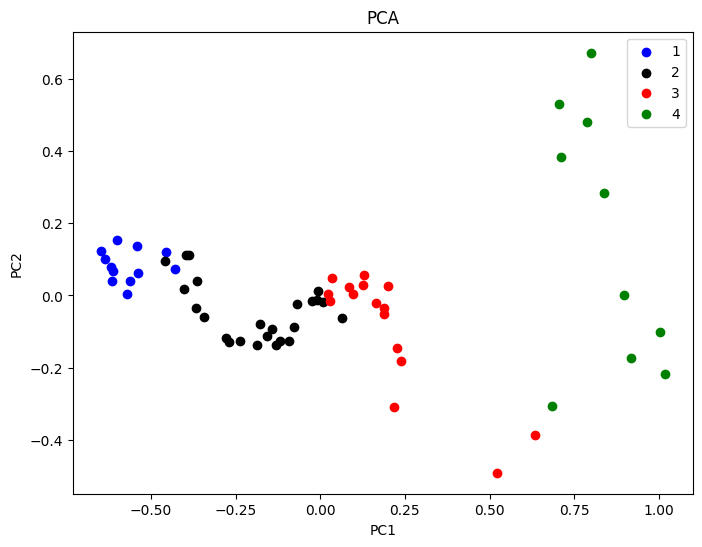

In [19]:
#Gráfico de los resultados de PCA
plt.figure(figsize=(8,6))
targets = [1, 2, 3, 4]
colors = ['blue', 'black', 'red', 'green']
for target, color in zip(targets, colors):
  indices = pca_df['Periodo'] == target
  plt.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], c = color, label = target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.legend()
plt.show()